In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df =  pd.read_csv("C:/Users/madhu/Downloads/FinMan/Train.csv")
desc = pd.read_csv('C:/Users/madhu/Downloads/FinMan/Train_data_dictionary.csv')

### Basic Understanding of the Data

In [34]:
desc

,Variable,Definition
0,ID,Unique Identifier for a row
1,City_Code,Code for the City of the customers
2,Region_Code,Code for the Region of the customers
3,Accomodation_Type,Customer Owns or Rents the house
4,Reco_Insurance_Type,Joint or Individual type for the recommended i...
5,Upper_Age,Maximum age of the customer
6,Lower _Age,Minimum age of the customer
7,Is_Spouse,If the customers are married to each other
8,NaN,(in case of joint insurance)
9,Health_Indicator,Encoded values for health of the customer


In [35]:
df.head(15)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [36]:
df.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50882.0,25441.500000,14688.512535,1.0,12721.25,25441.5,38161.75,50882.0
Region_Code,50882.0,1732.788707,1424.081652,1.0,523.00,1391.0,2667.00,6194.0
Upper_Age,50882.0,44.856275,17.310271,18.0,28.00,44.0,59.00,75.0
Lower_Age,50882.0,42.738866,17.319375,16.0,27.00,40.0,57.00,75.0
Holding_Policy_Type,30631.0,2.439228,1.025923,1.0,1.00,3.0,3.00,4.0
Reco_Policy_Cat,50882.0,15.115188,6.340663,1.0,12.00,17.0,20.00,22.0
Reco_Policy_Premium,50882.0,14183.950069,6590.074873,2280.0,9248.00,13178.0,18096.00,43350.4
Response,50882.0,0.239947,0.427055,0.0,0.00,0.0,0.00,1.0


In [39]:
df.Is_Spouse.value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

In [40]:
df['Health Indicator'].value_counts()

X1    13010
X2    10332
X3     6762
X4     5743
X5     1727
X6     1280
X7      196
X8       78
X9       63
Name: Health Indicator, dtype: int64

### Imputing Null Values and Reasons

#### We can see from the above data that there are missing value in 
##### 1   Health Indicator         39191 non-null  object 
##### 2   Holding_Policy_Duration  30631 non-null  object 
##### 3  Holding_Policy_Type      30631 non-null  float64

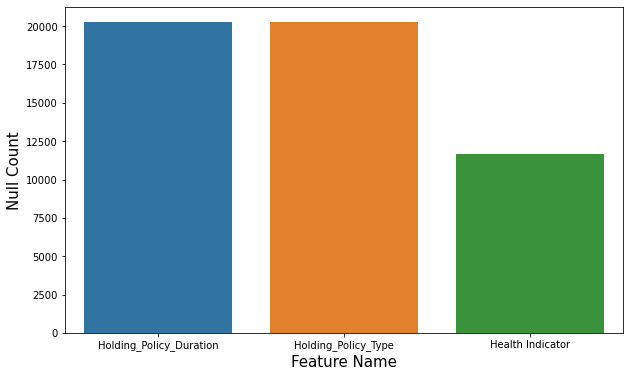

In [41]:
nulls_train = np.sum(df.isnull())
nullcols_train = nulls_train.loc[(nulls_train != 0)].sort_values(ascending=False)

barplot_dim = (10, 6)
ax = plt.subplots(figsize=barplot_dim)
sns.barplot(x=nullcols_train.index, y=nullcols_train)
plt.ylabel("Null Count", size=15);
plt.xlabel("Feature Name", size=15);
plt.show()

In [42]:
# Holding_Policy_Duration
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].str.rstrip('+')  # Remove the '+' at the end
df['Holding_Policy_Duration'] = pd.to_numeric(df['Holding_Policy_Duration'], errors='coerce')  # Convert to numeric, treating errors as NaN
df['Holding_Policy_Duration'].fillna(0, inplace=True)  # Replace NaN values with 0
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].astype(float)  # Convert to float
# Check the transformed column
print(df['Holding_Policy_Duration'])

0        14.0
1         0.0
2         1.0
3        14.0
4         3.0
         ... 
50877     0.0
50878     7.0
50879    14.0
50880     2.0
50881     2.0
Name: Holding_Policy_Duration, Length: 50882, dtype: float64


In [43]:
df['Holding_Policy_Type'].fillna(0, inplace=True)  # Replace NaN values with 0
# Check the transformed column
print(df['Holding_Policy_Type'].head())

0    3.0
1    0.0
2    1.0
3    3.0
4    1.0
Name: Holding_Policy_Type, dtype: float64


Mapping missing values in Holding policy duration and Holding policy type to 0 as it can be understood that null values in both the mentioned columns can be due to the customer having no policy or the customer has just taken the policy and has not completed a year.

In [44]:
df['Health Indicator'].fillna('X0', inplace=True)
# Check the transformed column
print(df['Health Indicator'].head())

0    X1
1    X2
2    X0
3    X1
4    X2
Name: Health Indicator, dtype: object


Missing values in Health indicator are imputed with X0 , indicating X0 as missing value.

ValueError: min() arg is an empty sequence

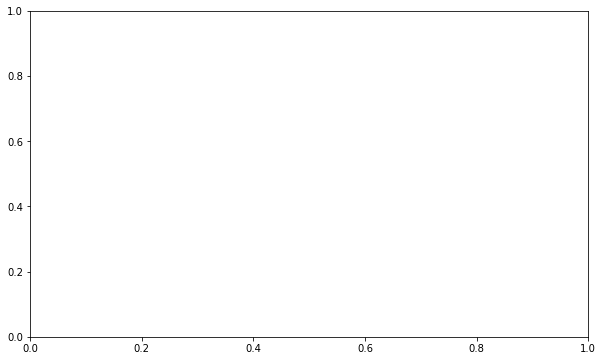

In [46]:
nulls_train = np.sum(df.isnull())
nullcols_train = nulls_train.loc[(nulls_train != 0)].sort_values(ascending=False)

barplot_dim = (10, 6)
ax = plt.subplots(figsize=barplot_dim)
sns.barplot(x=nullcols_train.index, y=nullcols_train)
plt.ylabel("Null Count", size=15);
plt.xlabel("Feature Name", size=15);
plt.show()

In [45]:
# Checking for null values after imputation
df.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

##### Now, we can say that our data is free of NaN values

### Exploratory Data Analysis

In [48]:
df.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator              10
Holding_Policy_Duration       15
Holding_Policy_Type            5
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [47]:
df.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

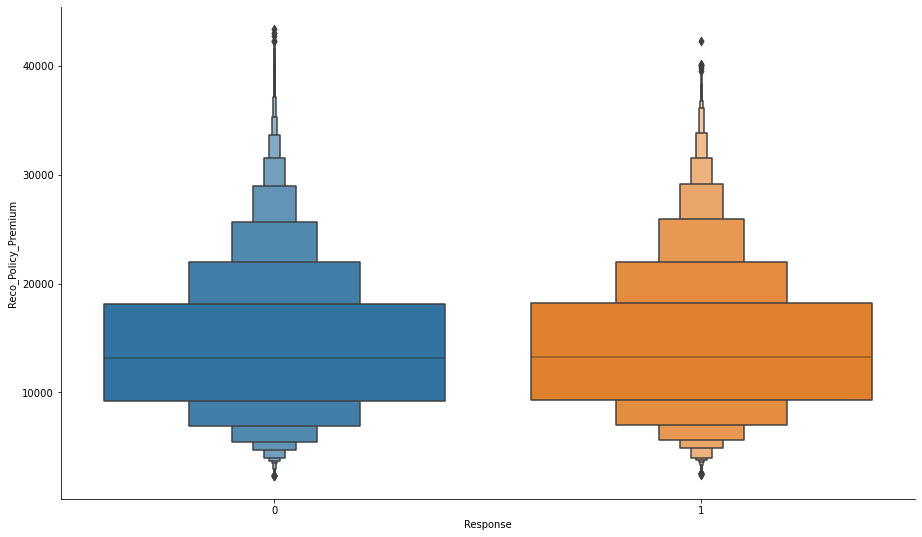

In [51]:
p = sns.catplot(x='Response', y='Reco_Policy_Premium', kind='boxen', data=df)
p.fig.set_size_inches(15,8)

##### Both the plots seem similar for both the responses.We can also see that there are some outliers.

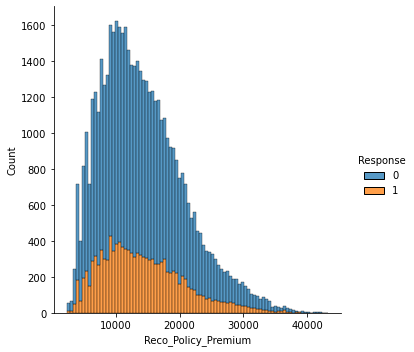

In [79]:
p = sns.displot(data=df, x="Reco_Policy_Premium",y= hue="Response", multiple="stack")

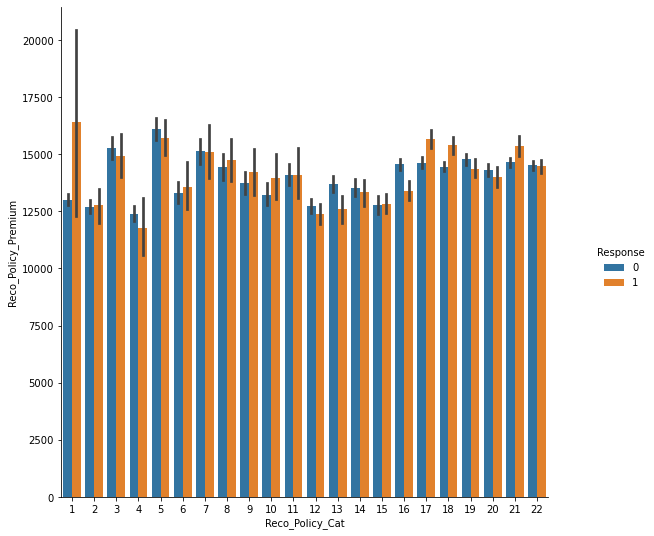

In [84]:
p = sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue='Response', kind='bar', data=df);
p.fig.set_size_inches(10,8)

##### We can see in the above plot that the cat 1 policy has te highest number of yes responses. Plotting that in the next plot

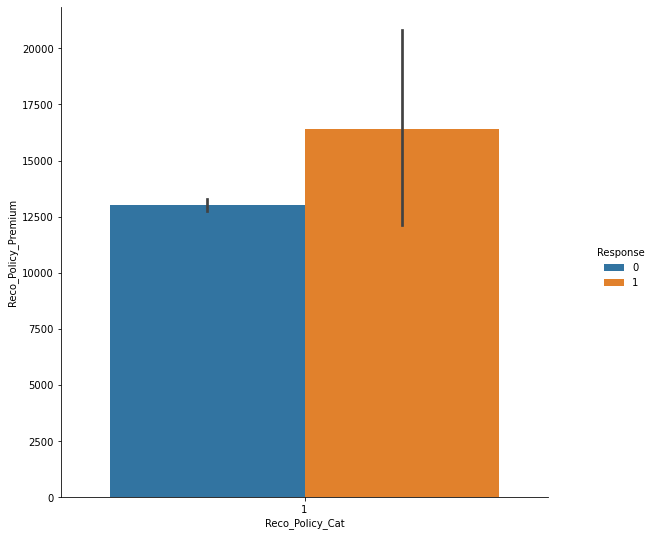

In [83]:
a = df[df['Reco_Policy_Cat'] == 1]
p = sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue='Response', kind='bar', data=a);
p.fig.set_size_inches(10,8)

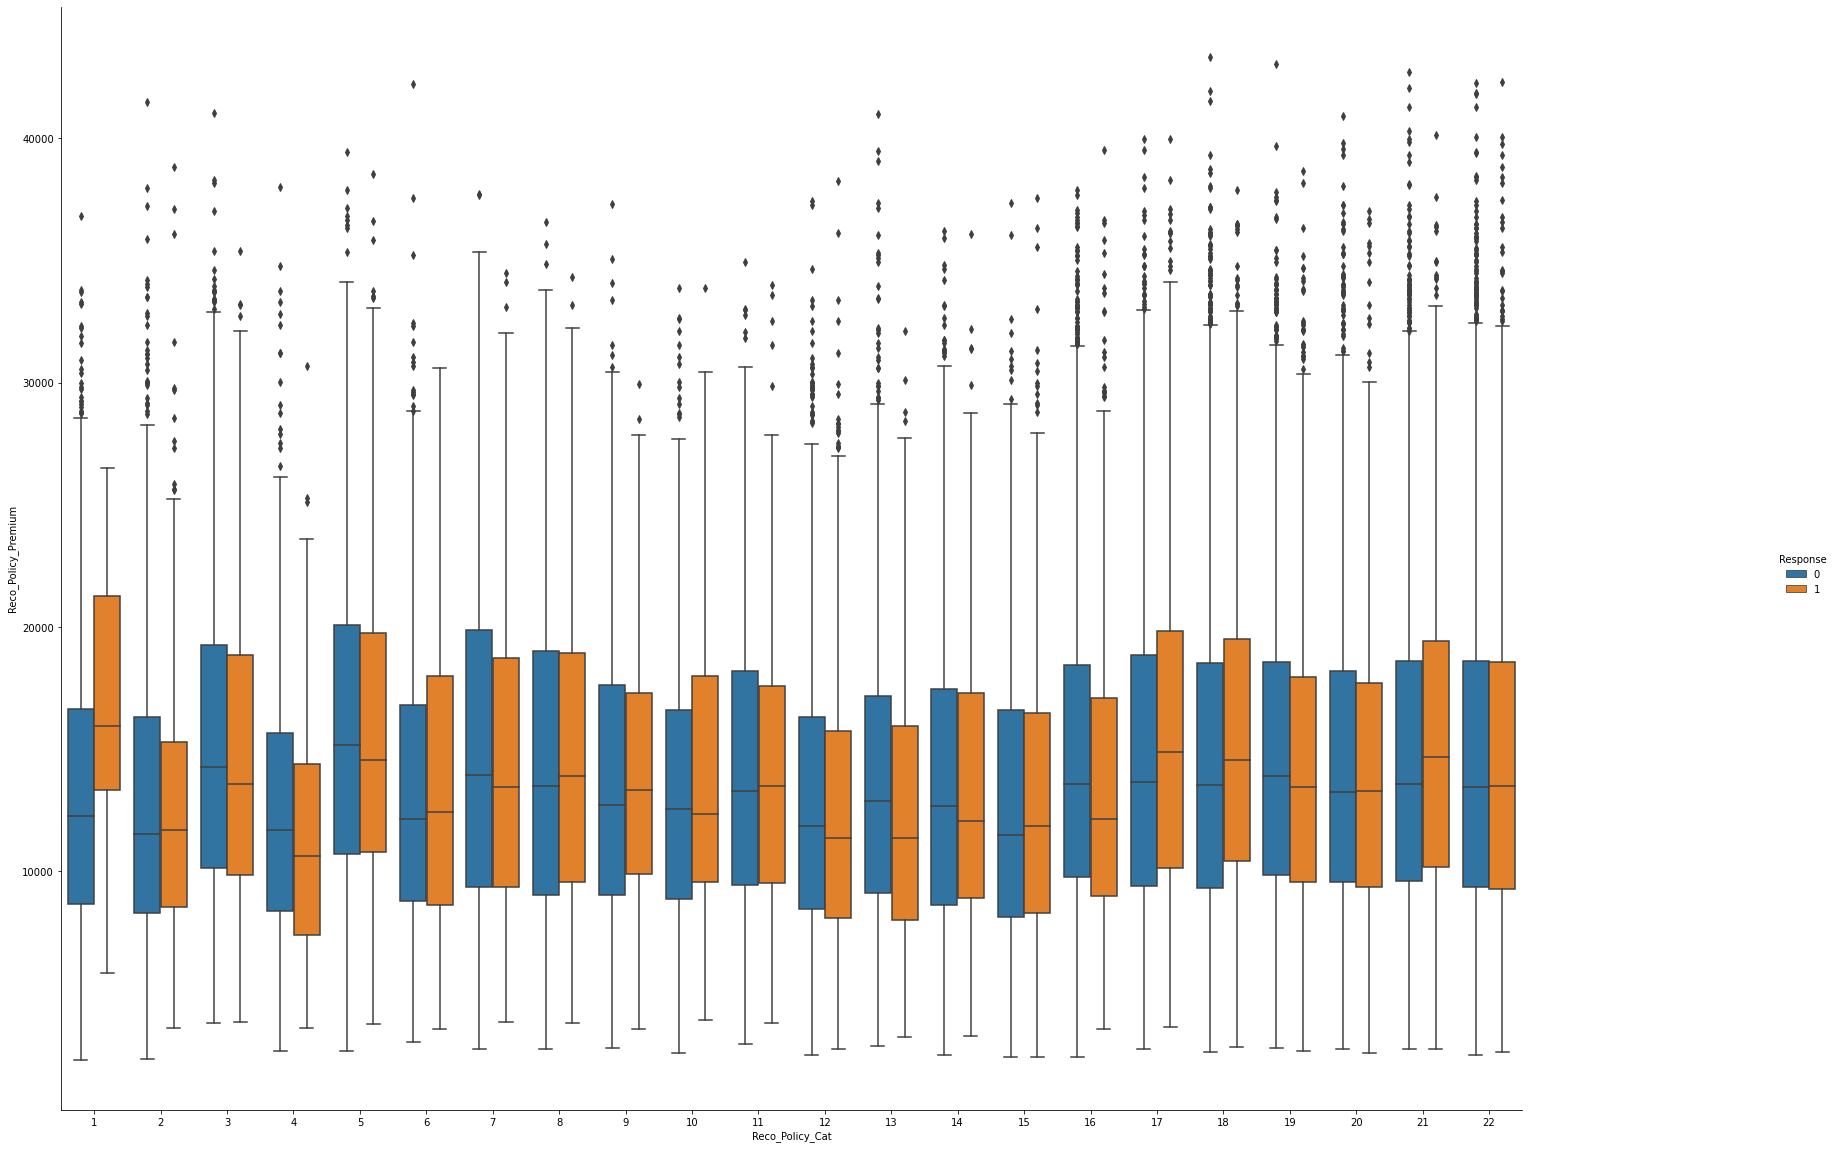

In [101]:
p = sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue='Response', kind='box', data=df);
p.fig.set_size_inches(30,18)

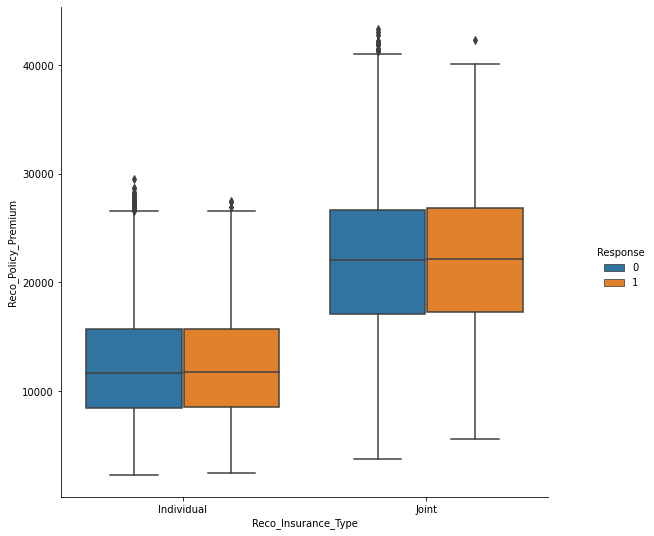

In [97]:
p = sns.catplot(x='Reco_Insurance_Type', y='Reco_Policy_Premium', hue='Response', kind='box', data=df);
p.fig.set_size_inches(10,8)

##### The median recommended premium for individual policies is lower than the median recommended premium for joint policies.

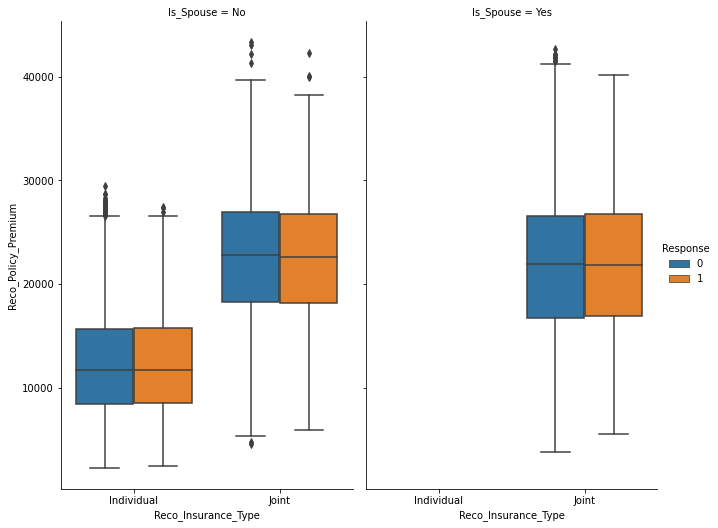

In [94]:
p = sns.catplot(x='Reco_Insurance_Type', y='Reco_Policy_Premium', col='Is_Spouse' ,hue='Response', kind='box', data=df);
p.fig.set_size_inches(10,8)

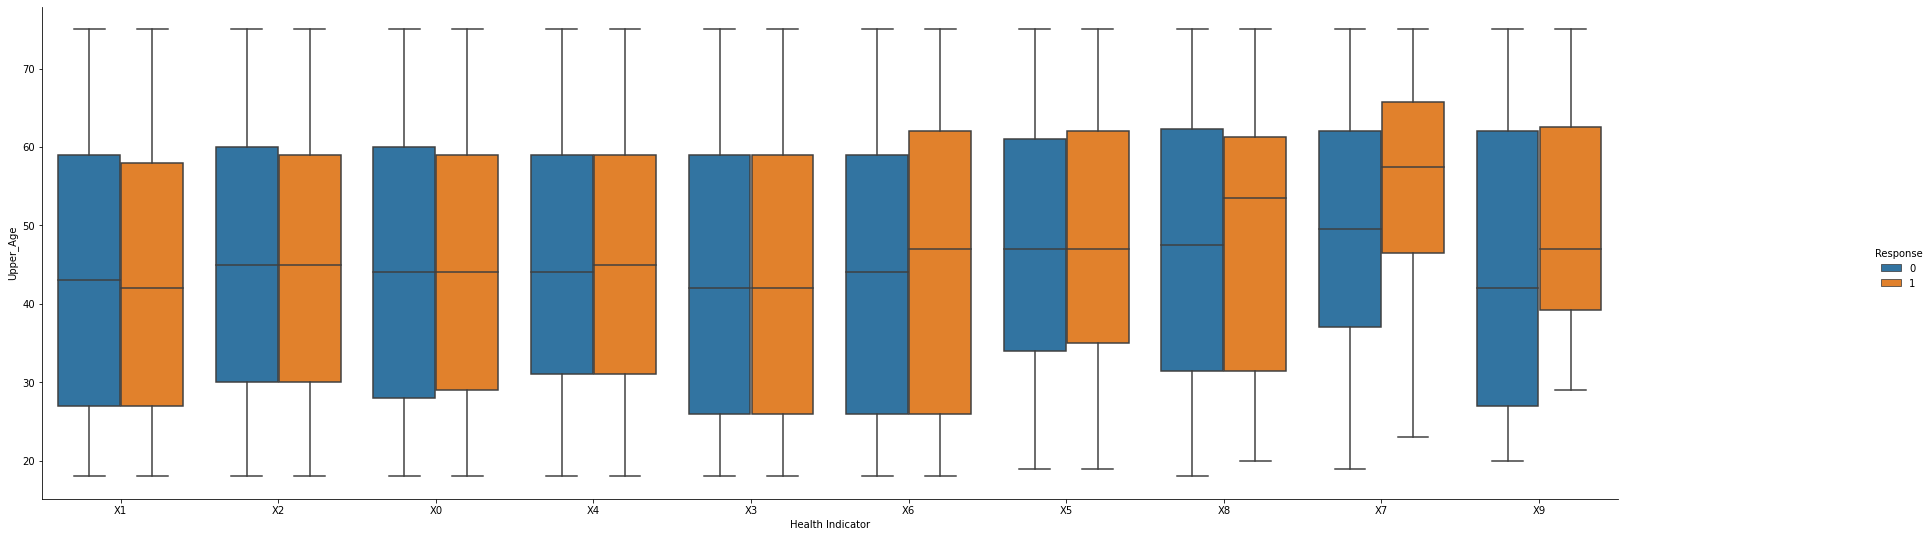

In [108]:
p = sns.catplot(x='Health Indicator', y='Upper_Age', hue='Response', kind='box', data=df);
p.fig.set_size_inches(30,8)

KeyboardInterrupt: 

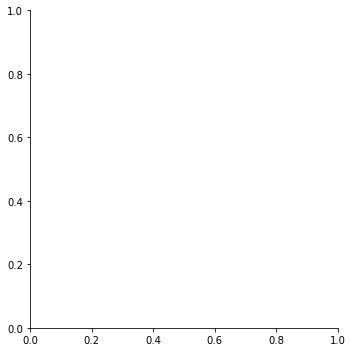

In [92]:
a = df[df['Response'] == 1]
p = sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue='Response', kind='bar', data=a,order=df.sort_values('Reco_Policy_Cat').Reco_Policy_Cat);
p.fig.set_size_inches(10,8)

In [103]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14.0,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0.0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X0,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14.0,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


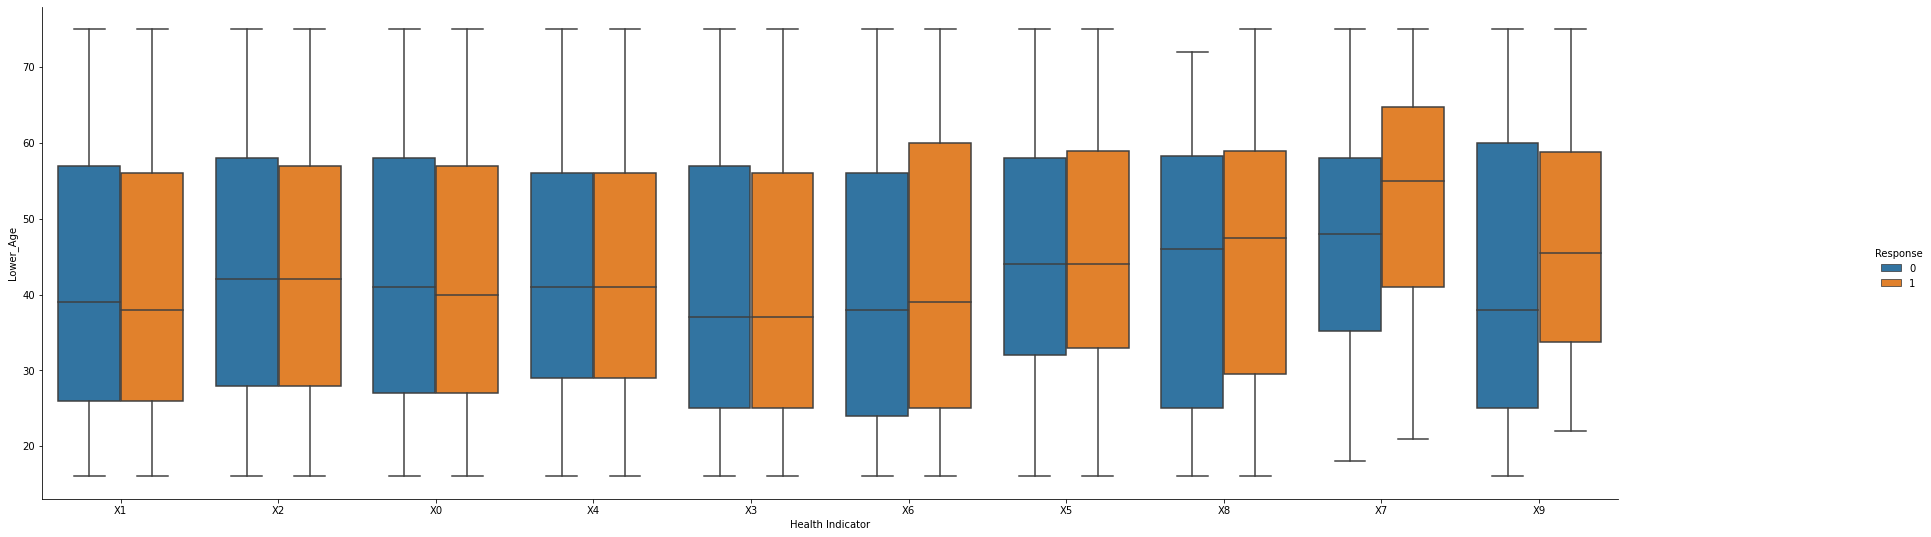

In [106]:
p = sns.catplot(x='Health Indicator', y='Lower_Age', hue='Response', kind='box', data=df);
p.fig.set_size_inches(30,8)

##### Certain health conditions like X7, X8 and X9 where the chances of getting a positive response is higher only after a particular age limit.

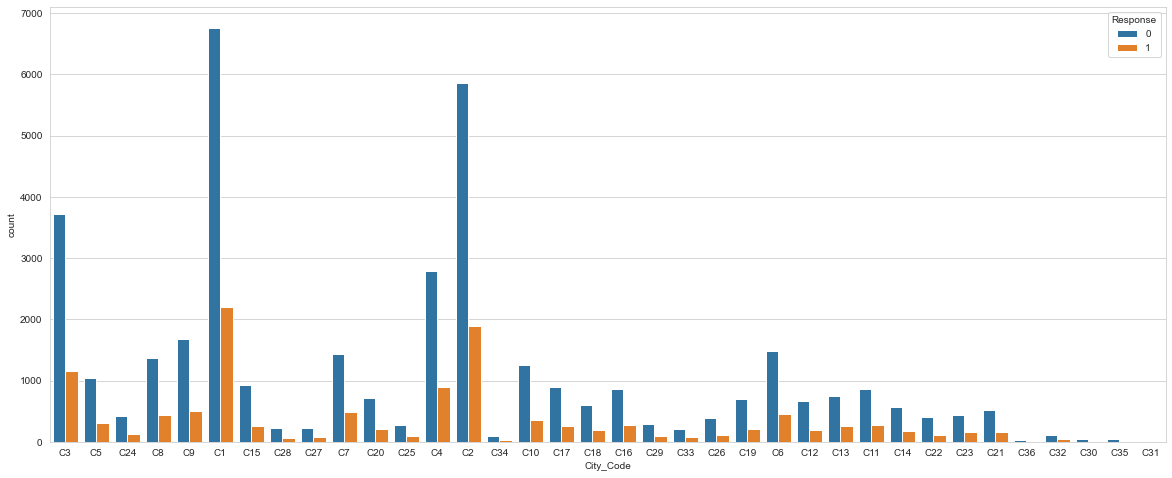

In [115]:
ax = plt.subplots(figsize=(20, 8))
sns.set_style("whitegrid")
sns.countplot(x='City_Code', hue='Response', data=df);

##### It seems that the cout of leads leading to no business(0) is higher that leads leading to any business(1) across all cities

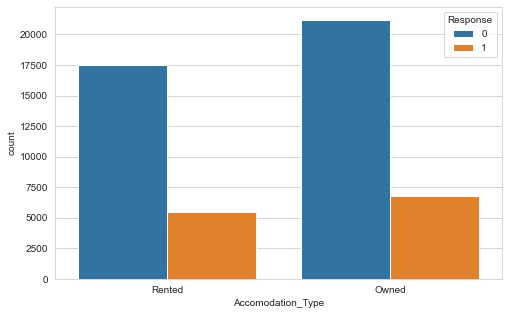

In [116]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Accomodation_Type', hue='Response', data=df);

##### When compared to customers who live on rent, customers who own a house have a chance of giving business(1). Whereas the amount of that is less too.

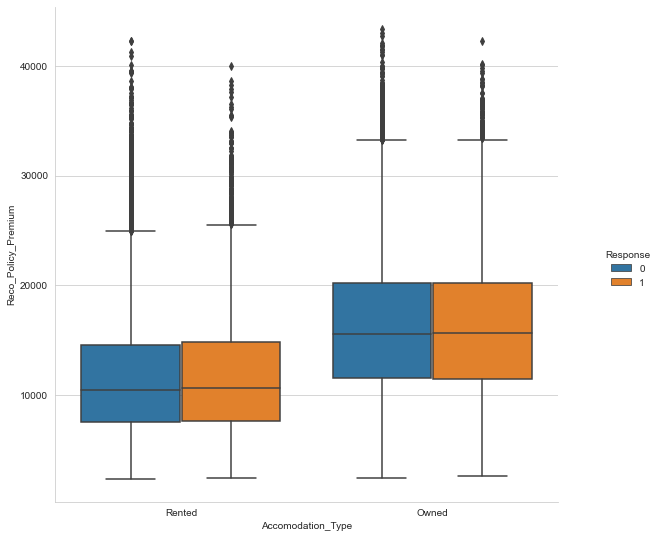

In [118]:
p = sns.catplot(x='Accomodation_Type', y='Reco_Policy_Premium', hue='Response', kind='box', data=df);
p.fig.set_size_inches(10,8)

##### People renting homes are less likely to buy insurances if the premium is too high.

In [119]:
df['Cust_Type'] = df['Holding_Policy_Duration'].apply(lambda x : 'New' if x==0 else 'Old')

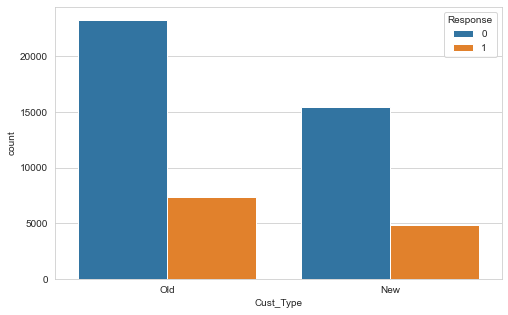

In [121]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Cust_Type', hue='Response', data=df);

##### An older customer is slightly more likely to take up an offered insurance as compared to new ones.

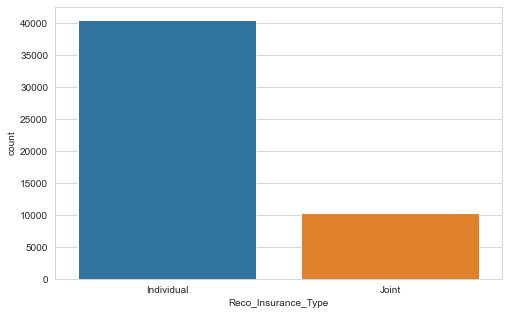

In [166]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Reco_Insurance_Type', data=df);

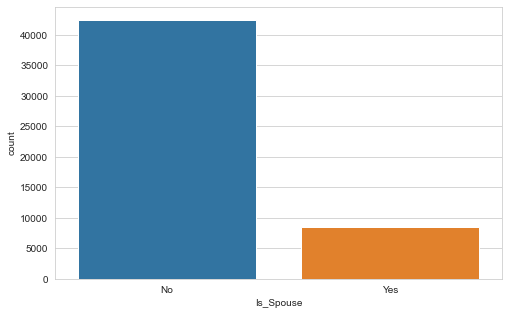

In [167]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Is_Spouse', data=df);

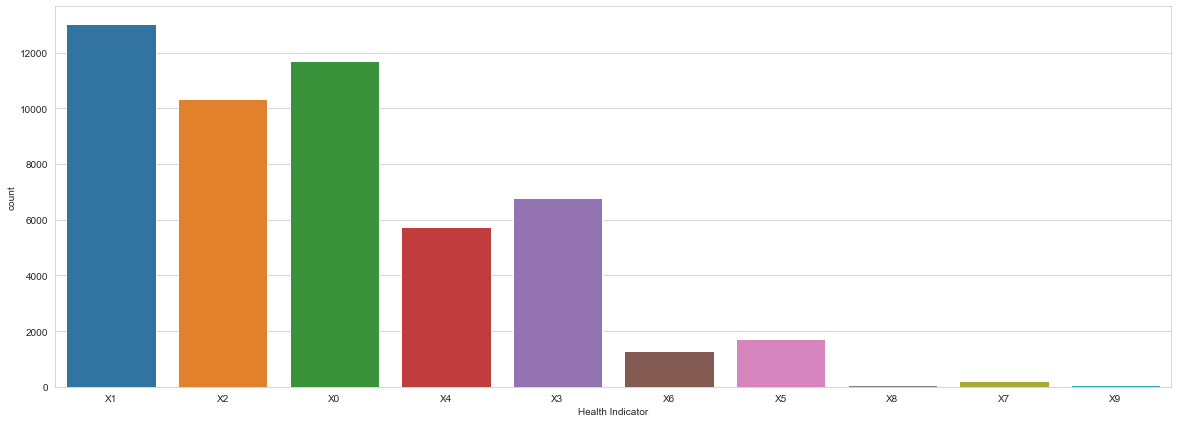

In [168]:
ax = plt.subplots(figsize=(20, 7))
sns.set_style("whitegrid")
sns.countplot(x='Health Indicator', data=df);

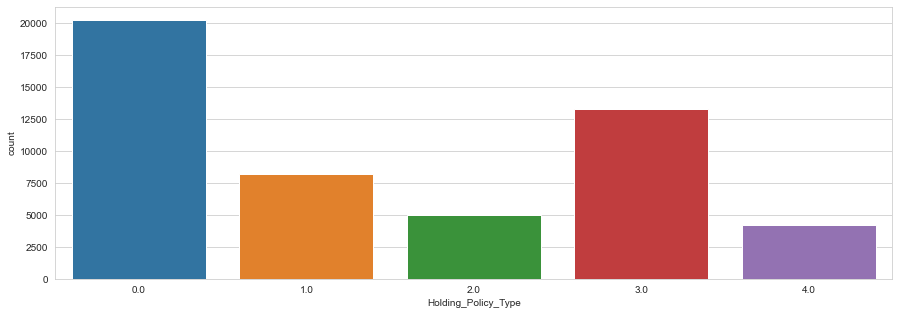

In [169]:
ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")
sns.countplot(x='Holding_Policy_Type', data=df);

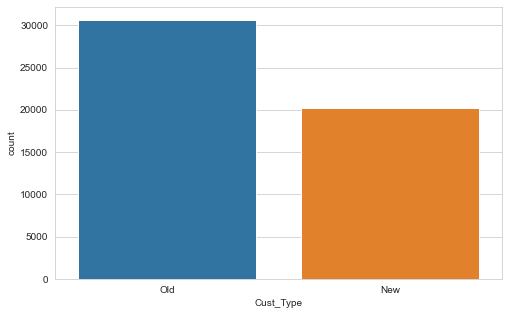

In [170]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Cust_Type', data=df);

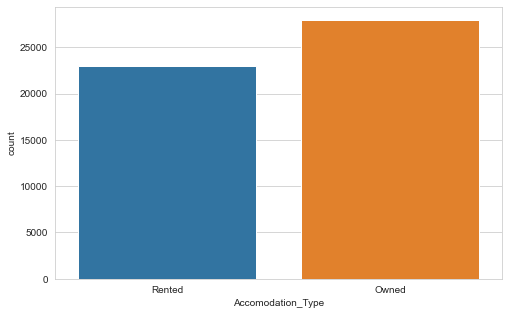

In [165]:
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Accomodation_Type', data=df);

### Numerical Features

In [123]:
target = ['Response']
not_features = ['ID', 'Response', 'kfold']
cols = list(df.columns)
features = [feat for feat in cols if feat not in not_features]
print(features)

['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Cust_Type']


In [124]:
categorical_features = [
    'City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Region_Code',
    'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat',
    'Cust_Type'
]
numerical_features = [feat for feat in features if feat not in categorical_features]

print(f'Categorical Features: {categorical_features}')
print(f'Numeric Features: {numerical_features}')

Categorical Features: ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Region_Code', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat', 'Cust_Type']
Numeric Features: ['Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Reco_Policy_Premium']


#### Correlation of all Numerical Variables

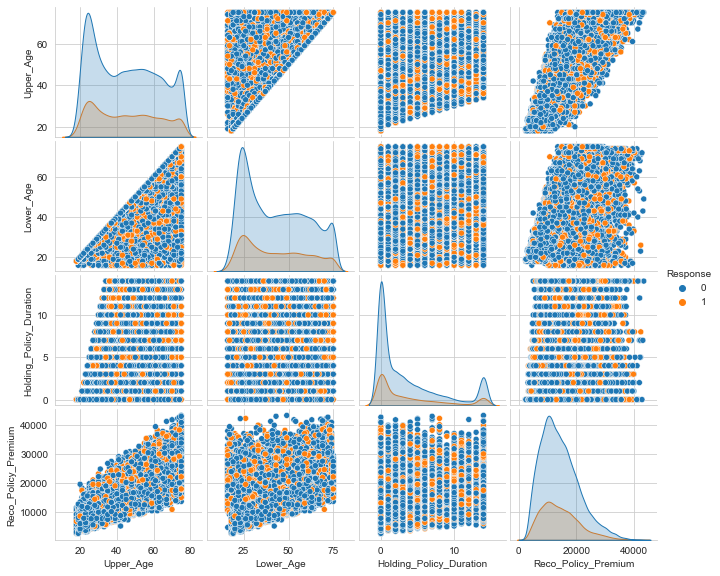

In [126]:

p = sns.pairplot(df[numerical_features + ['Response']], hue='Response')
p.fig.set_size_inches(10,8)

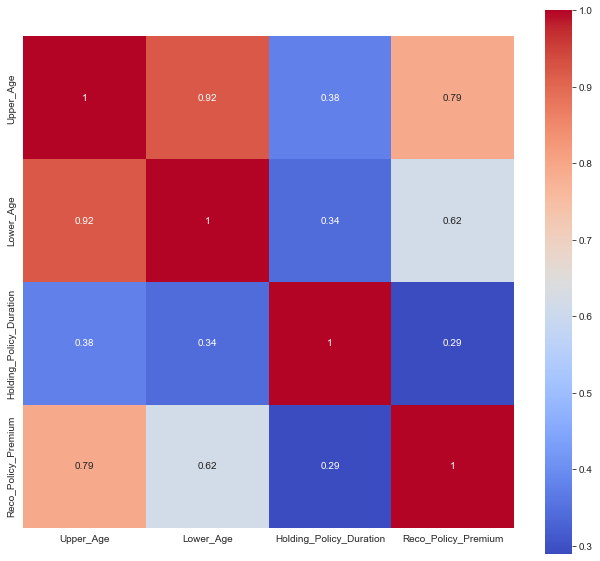

In [131]:
df_cor = df[numerical_features].corr()
plt.figure(figsize=(11,10))
sns.heatmap(df_cor, square=True,cmap='coolwarm',annot=True);

#### The above heatmap suggests that the recommended policy premium increases with increasing of age, and it is relatively low with lower age

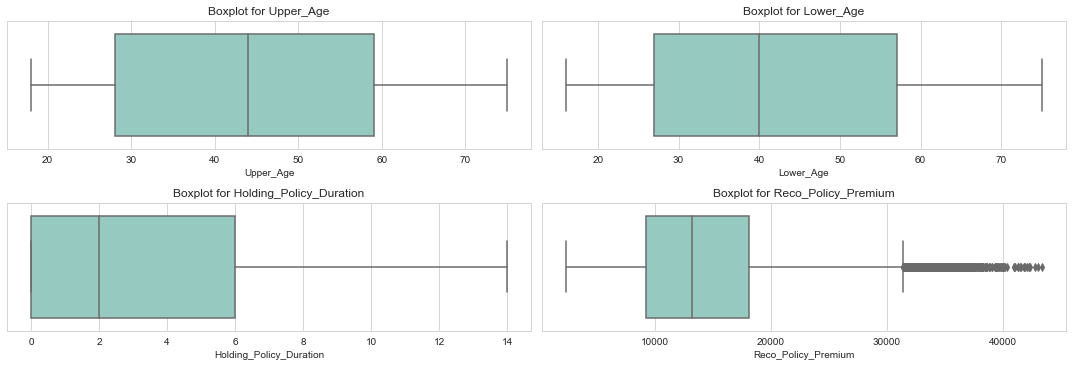

In [164]:
plt.figure(figsize=(15, 25))

for i, column in enumerate(numerical_features):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(x=df[column],palette="Set3")
    plt.title(f'Boxplot for {column}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

##### Reco_Policy_Premium has outliers which can be managed by taking a logarithm of the feature

### Feature Engineering

In [173]:
df['Age_Conf_Interval']

0         0
1        53
2         0
3         4
4         0
         ..
50877     0
50878     0
50879     0
50880    22
50881     0
Name: Age_Conf_Interval, Length: 50882, dtype: int64

In [171]:
df['Age_Conf_Interval'] = df['Upper_Age'] - df['Lower_Age']

In [174]:
#Removing Outliers
df['Reco_Policy_Premium_log'] = np.log(df['Reco_Policy_Premium'])

<AxesSubplot:xlabel='Reco_Policy_Premium_log'>

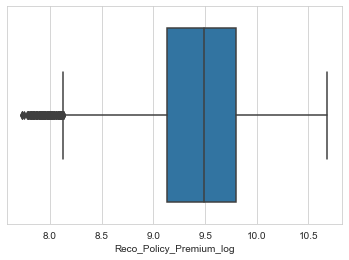

In [175]:
sns.boxplot(x = 'Reco_Policy_Premium_log',data=df)

In [177]:
df['Mean_Age'] = (df['Upper_Age'] + df['Upper_Age'])/2
df['Permium_Per_Age_Year'] = np.log(df['Reco_Policy_Premium']/df['Mean_Age'])

In [178]:
df['Reco_Policy_Premium_Bin_10'] = pd.cut(df['Reco_Policy_Premium'], bins=10, labels=False)
df['Reco_Policy_Premium_Bin_50'] = pd.cut(df['Reco_Policy_Premium'], bins=50, labels=False)

### Complete dataset after feature engineering

In [179]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,...,Reco_Policy_Cat,Reco_Policy_Premium,Response,Cust_Type,Age_Conf_Interval,Reco_Policy_Premium_log,Mean_Age,Permium_Per_Age_Year,Reco_Policy_Premium_Bin_10,Reco_Policy_Premium_Bin_50
0,1,C3,3213,Rented,Individual,36,36,No,X1,14.0,...,22,11628.0,0,Old,0,9.361171,36.0,5.777652,2,11
1,2,C5,1117,Owned,Joint,75,22,No,X2,0.0,...,22,30510.0,0,New,53,10.325810,75.0,6.008322,6,34
2,3,C5,3732,Owned,Individual,32,32,No,X0,1.0,...,19,7450.0,1,Old,0,8.915969,32.0,5.450233,1,6
3,4,C24,4378,Owned,Joint,52,48,No,X1,14.0,...,19,17780.0,0,Old,4,9.785830,52.0,5.834586,3,18
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,...,16,10404.0,0,Old,0,9.249946,44.0,5.465756,1,9


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          50882 non-null  int64  
 1   City_Code                   50882 non-null  object 
 2   Region_Code                 50882 non-null  int64  
 3   Accomodation_Type           50882 non-null  object 
 4   Reco_Insurance_Type         50882 non-null  object 
 5   Upper_Age                   50882 non-null  int64  
 6   Lower_Age                   50882 non-null  int64  
 7   Is_Spouse                   50882 non-null  object 
 8   Health Indicator            50882 non-null  object 
 9   Holding_Policy_Duration     50882 non-null  float64
 10  Holding_Policy_Type         50882 non-null  float64
 11  Reco_Policy_Cat             50882 non-null  int64  
 12  Reco_Policy_Premium         50882 non-null  float64
 13  Response                    508

In [182]:
df.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator              0
Holding_Policy_Duration       0
Holding_Policy_Type           0
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
Cust_Type                     0
Age_Conf_Interval             0
Reco_Policy_Premium_log       0
Mean_Age                      0
Permium_Per_Age_Year          0
Reco_Policy_Premium_Bin_10    0
Reco_Policy_Premium_Bin_50    0
dtype: int64